## Домашнее задание по теме: "Классификация: Логистическая регрессия и SVM"

Описание задания:

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

### Получите данные и загрузите их в рабочую среду

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# для загрузки csv на google colab
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (4).csv


In [ ]:
# создаем датафрейм из csv
df = pd.read_csv('./adult.csv')

### 2. Проведите первичный анализ

In [ ]:
# проверяем наличие данных
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# смотрим типы данных объектов, пропуски, названия атрибутов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 3. Проверьте данные на пропуски. Удалите в случае обнаружения

*Предложите альтернативный способ работы с пропусками

In [ ]:
# удостоверяемся а том, что пропусков в данных нет
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

*Алтернативой удаления строк с отсутсвующими данными может служить расчет пропущенных значений со средними значениями в наборе данных.*

### 4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

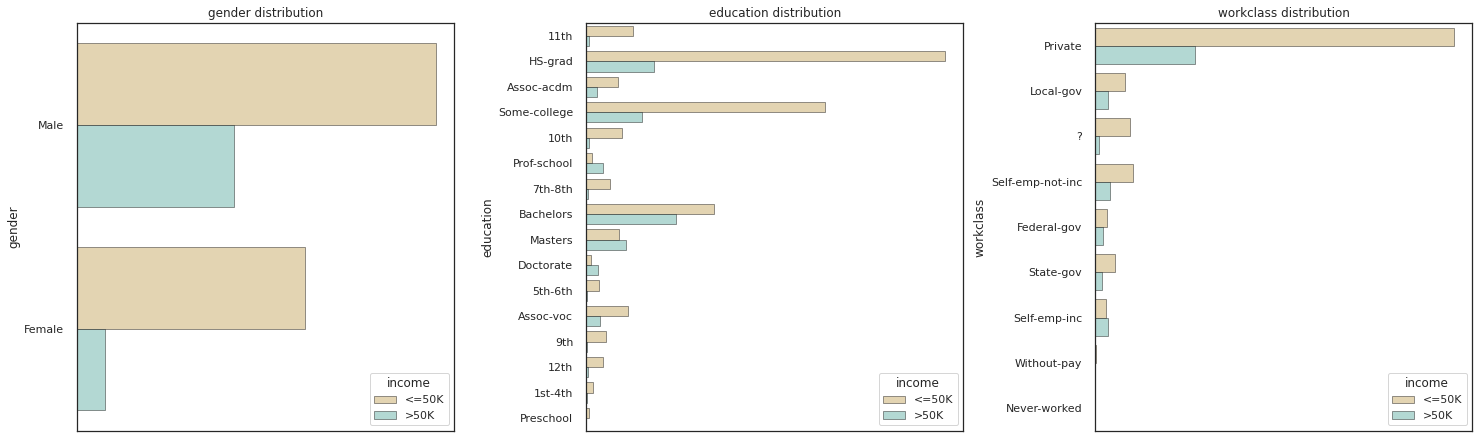

In [ ]:
# строим графики распределения по полу, образованию и классу работы + уровень дохода в этих категориях
selectedColumns = df[['gender', 'education', 'workclass']]
fg, ax = plt.subplots(1, 3, figsize = (25, 7.5))

for num, col in enumerate(selectedColumns):
    sns.countplot(data = df, y = col, ax = ax[num], hue = df['income'],
                    palette = 'BrBG', alpha = 0.8, edgecolor = 'black',
                    linewidth = 0.5).set(xticklabels = [], xlabel = None)

    sns.move_legend(ax[num], "lower right")
    ax[num].set_title(f'{col} distribution')


plt.subplots_adjust(wspace = 0.35, hspace = 0.35)
plt.show()

### 5. Преобразуйте категориальные признаки

In [ ]:
# выбор исходных столбцов
selectedColumns = df[['educational-num', 'gender', 'workclass', 'income']]

In [ ]:
# используем one hot encoding для преобразования категориального признака educational-num и workclass
X = pd.get_dummies(selectedColumns, columns=['educational-num', 'workclass'])
X = X.drop(['income'], axis=1) # удаляем признак income

In [ ]:
# импорт класса LabelEncoder для бинарного кодирования
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# перевод строковых значений пола и уровня дохода в бинарное предстваление
X['gender'] = le.fit_transform(X['gender'])
X.head()

,gender,educational-num_1,educational-num_2,educational-num_3,educational-num_4,educational-num_5,educational-num_6,educational-num_7,educational-num_8,educational-num_9,...,educational-num_16,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
le.fit(df['income'])
y = pd.Series(data=le.transform(df['income']))

### 6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 7.  Обучите модели логистической регрессии и опорных векторов на обучающем множестве

In [ ]:
# используем пайплайн для объединения нескольких операций (но в данном случае операция одна))
model = make_pipeline(LogisticRegression(max_iter=1000)) # пайплайн для логистической регрессии
clf = make_pipeline(SVC()) # пайплайн для метода опорных векторов

In [ ]:
# разделяем датасет на выборки для обучения и для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score

In [ ]:
# используем модель логистической регрессии
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
model_answer_train = model.score(X_train, y_train)
model_answer_test = model.score(X_test, y_test)

print(f'Доля правильных ответов на обучающей выборке {model_answer_train * 100:0.3f}%')
print(f'Доля правильных ответов на тестовой выборке {model_answer_test * 100:0.3f}%')

Доля правильных ответов на обучающей выборке 78.694%
Доля правильных ответов на тестовой выборке 79.148%


In [ ]:
# используем метод опорных векторов
clf.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
clf_answer_train = clf.score(X_train, y_train)
clf_answer_test = clf.score(X_test, y_test)
print(f'Доля правильных ответов на обучающей выборке {clf_answer_train * 100:0.3f}%')
print(f'Доля правильных ответов на тестовой выборке {clf_answer_test * 100:0.3f}%')

Доля правильных ответов на обучающей выборке 79.116%
Доля правильных ответов на тестовой выборке 79.394%


### 9. Сформулируйте выводы по проделанной работе. Кратко опишите какие преобразования были сделаны с данными. Сравните точность двух моделей. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. Что по вашему мнению нужно сделать, чтобы улучшить результат?

В ходе выполнения задания был проанализирован датасет, построены графики распределения по образованию и полу и рабочему классу. Выбраны признаки, на основе которых были обучены модели логистической регрессии и метода опорных векторов. Метод опорных векторов показал результаты лучше (для обучающей выборки на 0,422%, для тестовой на 0,246%).

На мой взгляд обе модели показали хорошие результаты. Улучшение результата возможно даст использование дополнительных признаков представленных в датасете (возраст, род занятий, раса и т.д.) + использование StandardScaler.